In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
import numpy as np
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [4]:
data=pd.read_csv("mumbai1.csv")
data.head(7)

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
5,5,17000000,2000,Kharghar,4,0,1,1,1,1,1,1,1,1,1,0,0,1,1
6,6,12500000,1550,Kharghar,3,0,0,1,1,1,1,0,0,1,1,0,1,0,0


In [7]:
data.shape


(6347, 19)

In [8]:
data.groupby('Location')['Location'].agg('count')

Location
15th Road                   1
4 Bunglows                  2
Adaigaon                    1
Agripada                    1
Airoli                     28
                           ..
vasant vihar thane west     4
vile parle west             7
vrindavan society           1
worli sea Fase              1
worli sea face              1
Name: Location, Length: 413, dtype: int64

In [9]:
data.isnull().sum()

Unnamed: 0              0
Price                   0
Area                    0
Location                0
No. of Bedrooms         0
New/Resale              0
Gymnasium               0
Lift Available          0
Car Parking             0
Maintenance Staff       0
24x7 Security           0
Children's Play Area    0
Clubhouse               0
Intercom                0
Landscaped Gardens      0
Indoor Games            0
Gas Connection          0
Jogging Track           0
Swimming Pool           0
dtype: int64

In [10]:
data['No. of Bedrooms'].unique()

array([1, 4, 3, 2, 5, 6, 7], dtype=int64)

In [11]:
data.Area.max()

8511

In [12]:
data.describe()

,Unnamed: 0,Price,Area,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
count,6347.000000,6.347000e+03,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000
mean,3173.000000,1.515401e+07,1004.327084,1.910036,0.341736,0.581377,0.801481,0.562943,0.281393,0.562943,0.559319,0.496297,0.484796,0.360643,0.219631,0.243107,0.381440,0.458327
std,1832.365411,2.015943e+07,556.375703,0.863304,0.474329,0.493372,0.398916,0.496061,0.449714,0.496061,0.496508,0.500026,0.499808,0.480225,0.414029,0.428993,0.485778,0.498300
min,0.000000,2.000000e+06,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1586.500000,5.300000e+06,650.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3173.000000,9.500000e+06,905.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4759.500000,1.750000e+07,1182.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,6346.000000,4.200000e+08,8511.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
data['price/sqft']=data['Price']/data['Area']

In [15]:
data.head(10)

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool,price/sqft
0,0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,6736.111111
1,1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1,7500.000000
2,2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1,10307.692308
3,3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0,6923.076923
4,4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0,7518.796992
5,5,17000000,2000,Kharghar,4,0,1,1,1,1,1,1,1,1,1,0,0,1,1,8500.000000
6,6,12500000,1550,Kharghar,3,0,0,1,1,1,1,0,0,1,1,0,1,0,0,8064.516129
7,7,10500000,1370,Sector-13 Kharghar,3,0,0,1,1,1,1,0,0,1,0,0,0,0,0,7664.233577
8,8,10500000,1356,Kharghar,3,0,1,1,1,1,1,0,1,1,0,0,0,1,1,7743.362832
9,9,15000000,1680,Kharghar,3,0,1,1,1,1,1,1,1,1,1,1,1,1,1,8928.571429


In [16]:
len(data.Location.unique())

413

In [17]:
data.Location=data.Location.apply(lambda x:x.strip())
Location_stats=data.groupby('Location')['Location'].agg('count').sort_values(ascending=False)
Location_stats

Location
Kharghar                533
Thane West              418
Mira Road East          390
Ulwe                    319
Borivali West           176
                       ... 
Pokhran Road No 2         1
Poonam Sagar Complex      1
Ramdev Park               1
Ranjanpada                1
worli sea face            1
Name: Location, Length: 413, dtype: int64

In [18]:
Location_stats_less_than_10=Location_stats[Location_stats<=10]

In [19]:
data.Location=data.Location.apply(lambda x:'other' if x in Location_stats_less_than_10 else x)

In [20]:
len(data.Location.unique())

90

In [21]:
data['New/Resale'].dropna()

0       0
1       0
2       0
3       0
4       0
       ..
6342    1
6343    0
6344    0
6345    0
6346    1
Name: New/Resale, Length: 6347, dtype: int64

In [22]:
data.head()

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool,price/sqft
0,0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,6736.111111
1,1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1,7500.000000
2,2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1,10307.692308
3,3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0,6923.076923
4,4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0,7518.796992


In [23]:
data1=data.drop(['New/Resale','Intercom','Landscaped Gardens','No. of Bedrooms'],axis=1)

In [24]:
data1.head(3)

,Unnamed: 0,Price,Area,Location,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Indoor Games,Gas Connection,Jogging Track,Swimming Pool,price/sqft
0,0,4850000,720,Kharghar,0,1,1,1,1,0,0,0,0,0,0,6736.111111
1,1,4500000,600,Kharghar,1,1,1,1,1,0,1,0,0,1,1,7500.000000
2,2,6700000,650,Kharghar,1,1,1,1,1,1,1,0,0,1,1,10307.692308


In [25]:
data.describe()

,Unnamed: 0,Price,Area,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool,price/sqft
count,6347.000000,6.347000e+03,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000
mean,3173.000000,1.515401e+07,1004.327084,1.910036,0.341736,0.581377,0.801481,0.562943,0.281393,0.562943,0.559319,0.496297,0.484796,0.360643,0.219631,0.243107,0.381440,0.458327,13555.465839
std,1832.365411,2.015943e+07,556.375703,0.863304,0.474329,0.493372,0.398916,0.496061,0.449714,0.496061,0.496508,0.500026,0.499808,0.480225,0.414029,0.428993,0.485778,0.498300,9573.921483
min,0.000000,2.000000e+06,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1597.444089
25%,1586.500000,5.300000e+06,650.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7234.042553
50%,3173.000000,9.500000e+06,905.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10493.827160
75%,4759.500000,1.750000e+07,1182.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,17142.857143
max,6346.000000,4.200000e+08,8511.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,109950.522265


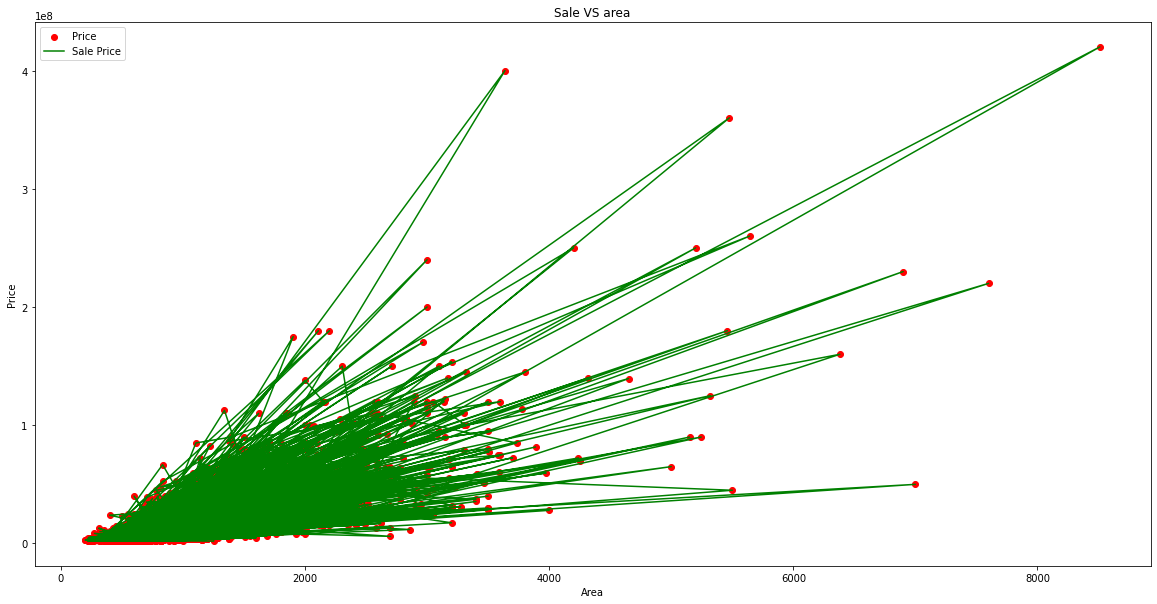

In [26]:


plt.scatter(data1.Area,data1.Price,color='red',label='Price')
plt.plot(data1.Area,data1.Price,color='green',label="Sale Price")
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Sale VS area')
plt.legend()
plt.show()

In [27]:

data1['bhk']=data['No. of Bedrooms']
data1.head()

,Unnamed: 0,Price,Area,Location,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Indoor Games,Gas Connection,Jogging Track,Swimming Pool,price/sqft,bhk
0,0,4850000,720,Kharghar,0,1,1,1,1,0,0,0,0,0,0,6736.111111,1
1,1,4500000,600,Kharghar,1,1,1,1,1,0,1,0,0,1,1,7500.000000,1
2,2,6700000,650,Kharghar,1,1,1,1,1,1,1,0,0,1,1,10307.692308,1
3,3,4500000,650,Kharghar,0,1,1,1,1,0,0,0,0,0,0,6923.076923,1
4,4,5000000,665,Kharghar,0,1,1,1,1,0,0,0,0,0,0,7518.796992,1


In [28]:
df=data1[~(data1.Area/data1.bhk<300)]
df.shape

(6187, 17)

In [29]:

df['price_sqft']=df['price/sqft']

C:\Users\My pc\AppData\Local\Temp\ipykernel_6468\1213058876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_sqft']=df['price/sqft']


In [30]:
df['price_sqft'].describe()

count      6187.000000
mean      13457.088189
std        9583.492750
min        1597.444089
25%        7142.857143
50%       10307.692308
75%       17022.659452
max      109950.522265
Name: price_sqft, dtype: float64

In [31]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Location'):
        m = np.mean(subdf.price_sqft)
        st = np.std(subdf.price_sqft)
        reduced_df = subdf[(subdf.price_sqft>(m-st)) & (subdf.price_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df1 = remove_pps_outliers(df)
df1.shape

(4801, 18)

In [32]:
df.head()

,Unnamed: 0,Price,Area,Location,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Indoor Games,Gas Connection,Jogging Track,Swimming Pool,price/sqft,bhk,price_sqft
0,0,4850000,720,Kharghar,0,1,1,1,1,0,0,0,0,0,0,6736.111111,1,6736.111111
1,1,4500000,600,Kharghar,1,1,1,1,1,0,1,0,0,1,1,7500.000000,1,7500.000000
2,2,6700000,650,Kharghar,1,1,1,1,1,1,1,0,0,1,1,10307.692308,1,10307.692308
3,3,4500000,650,Kharghar,0,1,1,1,1,0,0,0,0,0,0,6923.076923,1,6923.076923
4,4,5000000,665,Kharghar,0,1,1,1,1,0,0,0,0,0,0,7518.796992,1,7518.796992


In [33]:
df1=df.drop(['price/sqft'],axis=1)

In [34]:
def plot_scatter_chart(df,Location):
    bhk2 = df[(df.Location==Location) & (df.bhk==2)]
    bhk3 = df[(df.Location==Location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.Area,bhk2.Price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.Area,bhk3.Price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price ")
    plt.title(Location)
    plt.legend()
    
    

In [35]:
df1.tail(5)

,Unnamed: 0,Price,Area,Location,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Indoor Games,Gas Connection,Jogging Track,Swimming Pool,bhk,price_sqft
6342,6342,2485000,700,other,0,0,0,0,0,0,0,0,0,0,0,1,3550.000000
6343,6343,14500000,900,Thane West,0,0,0,0,0,0,0,0,0,0,0,2,16111.111111
6344,6344,14500000,900,Thane West,0,1,0,0,0,0,0,0,1,0,0,2,16111.111111
6345,6345,4100000,1380,Boisar,0,0,0,0,0,0,0,0,0,0,0,3,2971.014493
6346,6346,2750000,700,Badlapur East,1,1,1,0,1,1,1,1,0,1,1,1,3928.571429


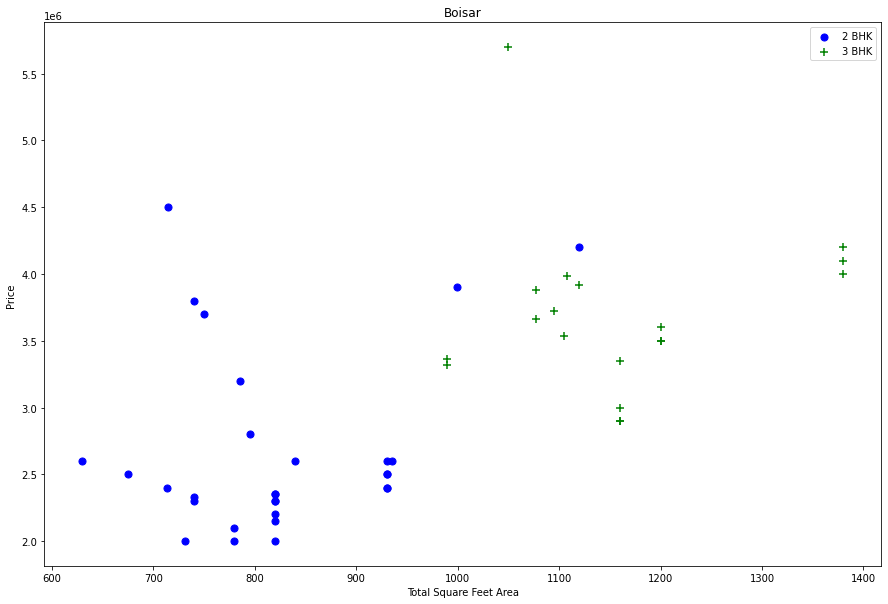

In [39]:
 plot_scatter_chart(df1,'Boisar') 

In [45]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for Location, Location_df in df.groupby('Location'):
        bhk_stats = {}
        for bhk, bhk_df in Location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_sqft),
                'std': np.std(bhk_df.price_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in Location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df2 = remove_bhk_outliers(df1)

df2.shape

(4543, 17)

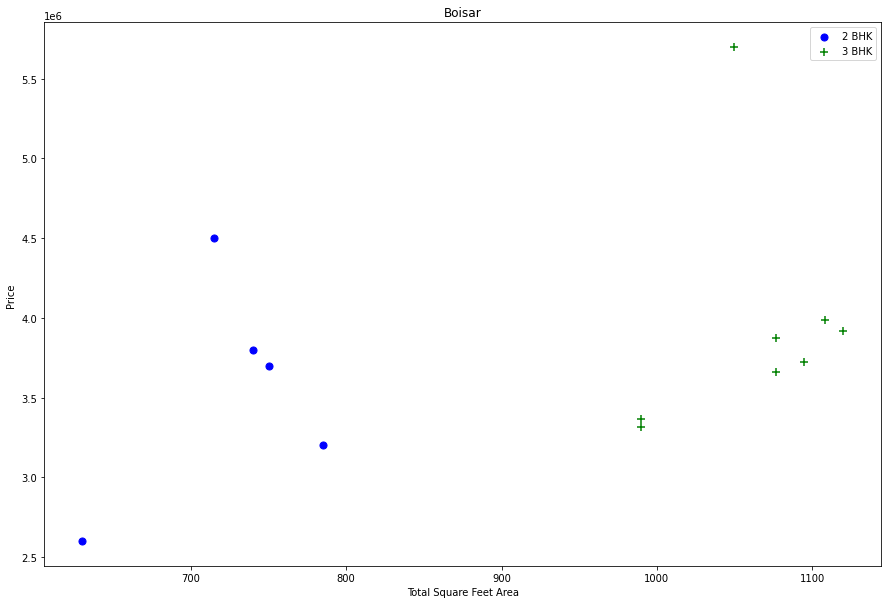

In [48]:
plot_scatter_chart(df2,'Boisar')

Text(0, 0.5, 'Count')

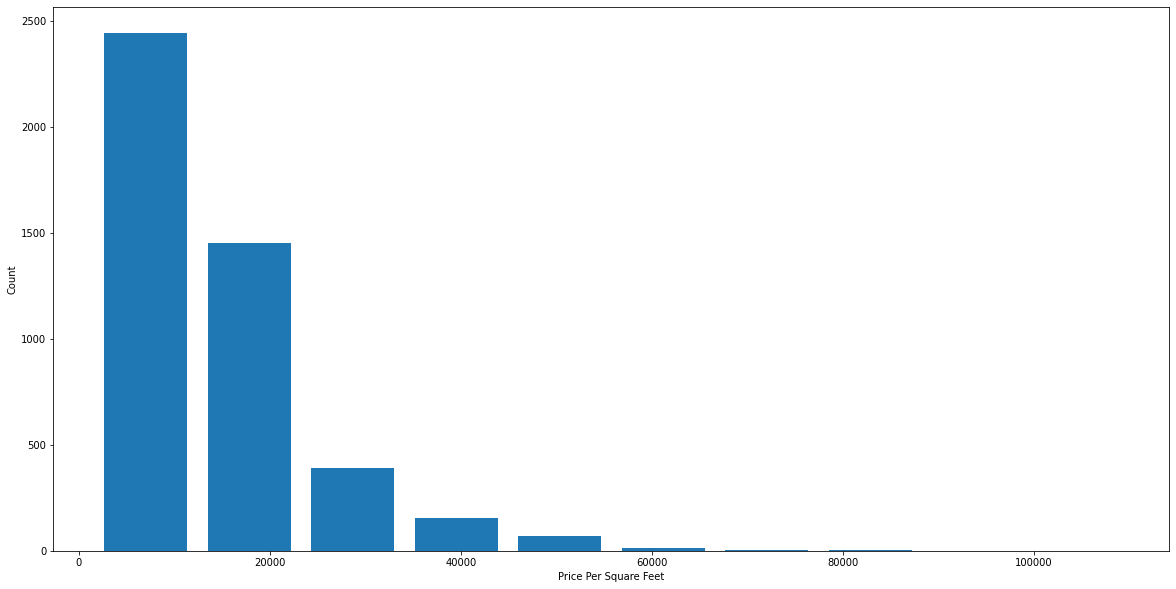

In [50]:

matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df2.price_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [52]:
df1['Lift Available'].unique()

array([1, 0], dtype=int64)

In [54]:
df1['Gymnasium'].unique()

array([0, 1], dtype=int64)

In [56]:
df1['Car Parking'].unique()
df1['Maintenance Staff'].unique()
df1['24x7 Security'].unique()

array([1, 0], dtype=int64)

In [60]:
dummy=pd.get_dummies(df2.Location)
dummy.head(2)

,Airoli,Ambernath East,Ambernath West,Andheri,Andheri East,Andheri West,Badlapur East,Bandra East,Bandra West,Belapur,...,Ville Parle East,Virar,Virar East,Virar West,Wadala,Wadala East Wadala,Worli,matunga east,mumbai,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
df3 = pd.concat([df2,dummy.drop('other',axis='columns')],axis='columns')
df3.head()

,Unnamed: 0,Price,Area,Location,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,...,Vashi,Ville Parle East,Virar,Virar East,Virar West,Wadala,Wadala East Wadala,Worli,matunga east,mumbai
0,0,4850000,720,Kharghar,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,4500000,600,Kharghar,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,6700000,650,Kharghar,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,3,4500000,650,Kharghar,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,4,5000000,665,Kharghar,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
df4=df3.drop('Location',axis='columns')


In [109]:
x=df4.drop('Price',axis='columns')
x.head(2)

,Unnamed: 0,Area,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Indoor Games,...,Vashi,Ville Parle East,Virar,Virar East,Virar West,Wadala,Wadala East Wadala,Worli,matunga east,mumbai
0,0,720,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,600,1,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
y=df4.Price
y.head(2)

0    4850000
1    4500000
Name: Price, dtype: int64

In [111]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [112]:
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8766441254215354

In [113]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.86950291, 0.86604096, 0.84736172, 0.88747879, 0.90726519])

In [114]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

C:\Users\My pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\My pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous beha

C:\Users\My pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\My pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\My pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


,model,best_score,best_params
0,linear_regression,0.875530,{'normalize': False}
1,lasso,0.875531,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.952820,"{'criterion': 'mse', 'splitter': 'best'}"


In [115]:
##although decision tree has 94 accuracy still i m going with l
x.head(2)

,Unnamed: 0,Area,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Indoor Games,...,Vashi,Ville Parle East,Virar,Virar East,Virar West,Wadala,Wadala East Wadala,Worli,matunga east,mumbai
0,0,720,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,600,1,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


C:\Users\My pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


-27555047.057729475